In [8]:
import cv2
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread('ml_current.jpg')[..., ::-1]

[ WARN:0@2.833] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('ml_current.jpg'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

In [10]:
plt.figure(figsize=(15, 7))
plt.imshow(img)

NameError: name 'img' is not defined

<Figure size 1080x504 with 0 Axes>

# 1.

In [7]:
!pip install opencv-python 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [4]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 8.2 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 12.8 MB/s eta 0:00:00
  Using cached packaging-21.3-py3-none-any.whl (40 kB)


# 2

In [12]:
import numpy as np
import numpy.random as npr 
n = 1000
d = 10
x = npr.rand(n, d)
print(x.shape)

y = x.T[0] + x.T[-1] + (npr.rand() * 2 - 1) / 100

(1000, 10)


In [13]:
x.dot(x.T).shape

(1000, 1000)

In [14]:
x.T.dot(x).shape

(10, 10)

In [15]:
x.dot(x.T)[None, :, None].shape

(1, 1000, 1, 1000)

# 3

In [17]:
from matplotlib import pyplot as plt

(array([ 12.,  58.,  82., 134., 179., 180., 152., 101.,  69.,  33.]),
 array([0.02857189, 0.22420565, 0.4198394 , 0.61547316, 0.81110692,
        1.00674067, 1.20237443, 1.39800819, 1.59364194, 1.7892757 ,
        1.98490946]),
 <BarContainer object of 10 artists>)

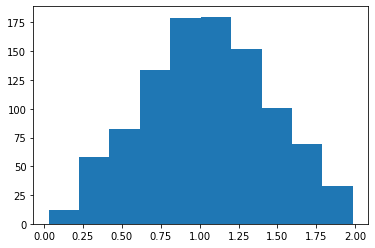

In [18]:
plt.hist(y)

(array([ 81.,  89., 103.,  94., 100., 104., 108., 100., 117., 104.]),
 array([2.64666908e-04, 1.00202368e-01, 2.00140069e-01, 3.00077770e-01,
        4.00015471e-01, 4.99953172e-01, 5.99890873e-01, 6.99828574e-01,
        7.99766275e-01, 8.99703976e-01, 9.99641677e-01]),
 <BarContainer object of 10 artists>)

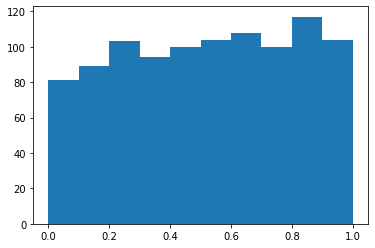

In [19]:
plt.hist(x.T[0])

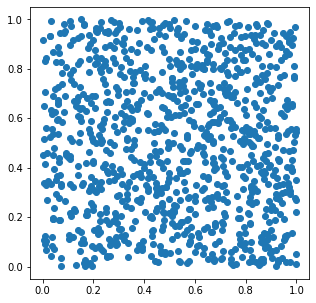

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(x.T[0], x[:, 1])

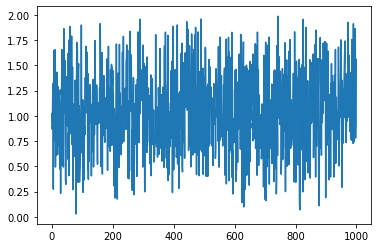

In [21]:
plt.plot(y)

# 4

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(data=np.append(x, y[:, None], axis=1), columns=["x_{}".format(100 + i) for i in range(d)] + ['y'])

In [24]:
df.mean()

x_100    0.522480
x_101    0.494507
x_102    0.495657
x_103    0.502572
x_104    0.499360
x_105    0.504477
x_106    0.503804
x_107    0.490264
x_108    0.503100
x_109    0.516092
y        1.048191
dtype: float64

In [25]:
# shift + tab
df.var(axis=1)

0      0.052626
1      0.072761
2      0.109342
3      0.157751
4      0.161922
         ...   
995    0.053547
996    0.214594
997    0.043693
998    0.035578
999    0.185795
Length: 1000, dtype: float64

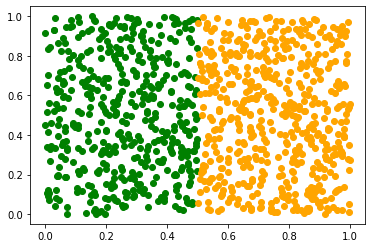

In [26]:
# plt.scatter(x.T[0], x[:, 1])

green_ind = df['x_100'] < 0.5

plt.scatter(x[green_ind, 0], x[green_ind, 1], color='green')
plt.scatter(x[~green_ind, 0], x[~green_ind, 1], color='orange')

In [27]:
(~green_ind + green_ind).mean()

1.0

# CV2

In [28]:
img = np.ones((400, 400, 3))

FileNotFoundError: [Errno 2] No such file or directory: 'imgs/1000.jpg'

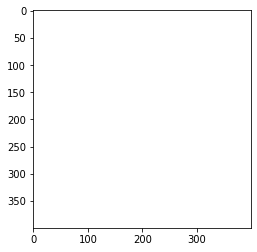

In [29]:
plt.imshow(img)
k = 0
plt.savefig('imgs/{}.jpg'.format(k + 1000))

In [30]:
import cv2

In [31]:
cv2.imwrite('img.jpg', (img * 255).astype(np.uint8))

True

In [32]:
base_img = (img * 255).astype(np.uint8)

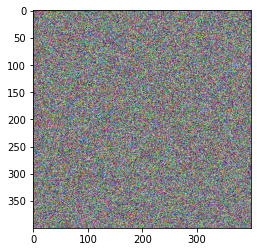

In [33]:
rand_img = npr.randint(0, 256, size=(400, 400, 3))
plt.imshow(rand_img)

In [34]:
out = cv2.VideoWriter('outpy.avi',
                      cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                      (img.shape[1], img.shape[0]))


for i in range(400):
    new_img = base_img.copy()
    
    new_img[:i, :i] = rand_img[:i, :i]
    
    out.write(new_img)

out.release()

# 6

In [35]:
from tqdm import tqdm

  0%|                                                                                 | 0/100 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'imgs/1000.jpg'

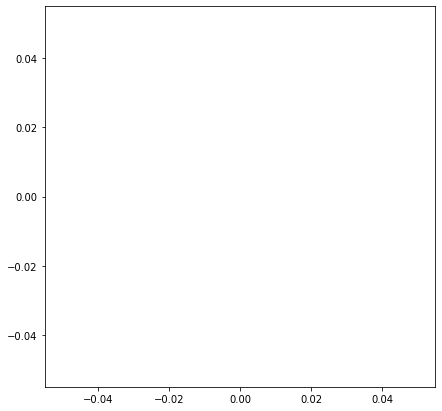

In [36]:
out = cv2.VideoWriter('maptlot.avi',
                      cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                      (504, 504))


for i in tqdm(range(100)):
    plt.figure(figsize=(7, 7))
    plt.scatter(x[:i, 0], x[:i, 1])
    plt.savefig('imgs/{}.jpg'.format(i + 1000))
    plt.close()
    
    img_ = cv2.imread('imgs/{}.jpg'.format(i + 1000))
    out.write(img_)

out.release()